In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words)))) #alphabet
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [7]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
    X, Y = [], []
    for w in words:

        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] # crop and append
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)

    print(X.shape, Y.shape)
    return(X,Y)

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [8]:
C = torch.randn((27,2))

In [22]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [21]:
C[X].view(-1,6)

tensor([[ 1.3925, -0.1884,  1.3925, -0.1884,  1.3925, -0.1884],
        [ 1.3925, -0.1884,  1.3925, -0.1884,  0.0098, -0.6753],
        [ 1.3925, -0.1884,  0.0098, -0.6753,  0.3593, -0.5705],
        ...,
        [ 0.9461,  1.1139,  0.9461,  1.1139,  1.1900, -0.6021],
        [ 0.9461,  1.1139,  1.1900, -0.6021,  0.9461,  1.1139],
        [ 1.1900, -0.6021,  0.9461,  1.1139, -0.3090, -0.1301]])

In [10]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [11]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [12]:
W1[0]

tensor([ 0.0394, -0.7623, -0.1359, -0.3426, -0.0505,  1.6057,  0.7688,  0.0100,
         0.7620, -0.4190,  0.5881,  1.0684,  0.2919, -0.2125,  0.3069, -0.9694,
        -2.4863, -1.5030,  0.5956, -1.6209, -0.7134,  1.5628,  0.1878,  0.2824,
         1.3318,  1.0805, -0.4833,  0.5181, -0.7904, -0.2538,  0.1455, -0.6089,
        -1.9559, -0.6888, -0.2933,  0.3994,  1.1270,  0.0322,  1.3803,  0.9162,
         0.4076,  0.1374,  1.6353,  1.3830,  0.3617,  1.0345, -0.1065, -0.9112,
        -1.3752, -0.0203, -0.6206,  0.1726, -0.1686,  1.8278,  0.5917, -0.2969,
        -0.6222,  0.4468, -1.6701,  2.0688, -0.0629,  1.4069,  0.0988, -0.4501,
         0.2516,  0.4055,  0.6162,  1.0566,  1.2131, -0.4380, -0.2980, -0.0116,
         0.5905,  0.0233,  0.1362, -0.9750,  1.6061, -2.2372,  0.3749,  0.9546,
         0.2951,  0.5014,  0.9872, -0.5158, -0.1451, -0.7124, -2.0898,  1.2320,
        -0.6812, -1.9846, -0.0774,  0.4816, -0.3377, -0.3687, -0.3195, -0.2806,
         0.5177, -0.4028,  0.1969,  0.43

In [13]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)

In [14]:
h

tensor([[-0.9915,  0.9204, -0.9674,  ..., -0.9999, -0.5070, -0.9673],
        [-0.9954,  0.9649, -0.7018,  ..., -0.9952, -0.9935,  0.2433],
        [-0.5357,  0.8266, -0.8838,  ..., -0.9973, -0.5777, -0.8396],
        ...,
        [ 0.4901,  0.9996, -0.9077,  ..., -0.6254, -0.4036,  0.9006],
        [ 0.4564,  0.8763, -0.9958,  ..., -0.9964,  0.9995, -0.9684],
        [-0.9998, -0.3991,  0.0347,  ...,  0.6155, -0.9760,  0.7777]])

In [97]:
h.shape

torch.Size([228146, 100])

In [98]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [99]:
logits = h @ W2 + b2

In [100]:
logits

tensor([[-1.7459e+00,  5.0084e+00,  5.1937e+00,  ...,  1.7513e+01,
         -6.5742e+00, -1.4278e+01],
        [-9.7070e+00,  7.6766e+00,  1.1697e+01,  ...,  1.8502e+01,
         -8.1754e+00, -9.6556e+00],
        [-5.5276e-03,  5.1413e+00, -6.9663e+00,  ...,  9.8019e+00,
         -7.1245e+00, -1.7875e+01],
        ...,
        [ 3.0531e+00,  3.6646e+00,  2.4134e+00,  ...,  1.1288e+01,
         -5.7773e+00, -9.9217e+00],
        [-4.7423e+00, -1.4228e-01,  1.0141e+01,  ...,  2.1509e+01,
         -9.0171e+00, -6.2557e+00],
        [ 5.5611e+00, -4.0781e+00,  2.4064e-01,  ...,  4.2661e+00,
          4.1448e+00, -7.7936e+00]])

In [101]:
logits.shape

torch.Size([228146, 27])

In [102]:
counts = logits.exp()

In [103]:
prob = counts/counts.sum(1, keepdims=True)

In [104]:
prob.shape

torch.Size([228146, 27])

In [107]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

#-----------------Put all together---------------

In [108]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [110]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10),generator = g)
W1 = torch.randn((30,200), generator = g)
b1 = torch.randn((200), generator = g)
W2 = torch.randn((200, 27), generator = g)
b2 = torch.randn((27), generator = g)
parameters = [C, W1, b1, W2, b2]

In [111]:
sum(p.nelement() for p in parameters)

11897

In [112]:
for p in parameters:
    p.requires_grad = True

In [113]:
lre = torch.linspace(-3,0,1000)
lrs = 10 **lre

In [116]:
lri = []
lossi = []
stepi = []

In [121]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  print(i, loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

0 4.390981197357178
1 3.7752456665039062
2 3.6935720443725586
3 3.183911085128784
4 2.7422122955322266
5 3.010831594467163
6 3.3037166595458984
7 3.7684483528137207
8 3.1952877044677734
9 3.1165425777435303
10 2.8953733444213867
11 3.7997231483459473
12 4.16320276260376
13 3.8940789699554443
14 3.5756947994232178
15 3.918220281600952
16 3.315406322479248
17 4.634866237640381
18 4.457736492156982
19 4.844855308532715
20 3.6026742458343506
21 3.5755813121795654
22 3.332200765609741
23 2.836773633956909
24 3.490288019180298
25 2.8980441093444824
26 3.081172466278076
27 2.9149582386016846
28 3.6941158771514893
29 3.472952365875244
30 4.0418243408203125
31 3.993257522583008
32 4.008612632751465
33 4.877277374267578
34 4.509929180145264
35 4.159892559051514
36 4.085344314575195
37 3.5877928733825684
38 4.1632490158081055
39 3.4136319160461426
40 3.918649911880493
41 3.7016546726226807
42 4.907328128814697
43 3.95880389213562
44 3.7608089447021484
45 2.800464153289795
46 2.7990305423736572
47

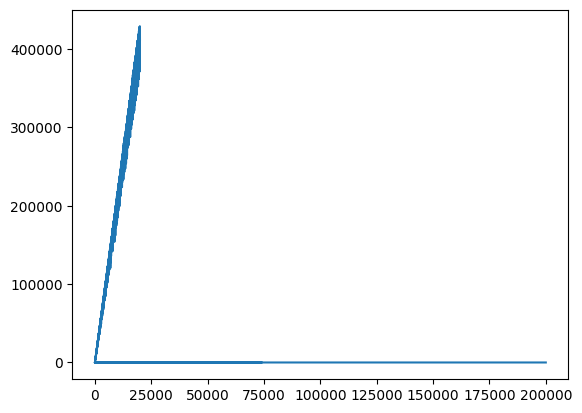

In [122]:
plt.plot(stepi, lossi)

In [123]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.8052, grad_fn=<NllLossBackward0>)

In [124]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.7934, grad_fn=<NllLossBackward0>)

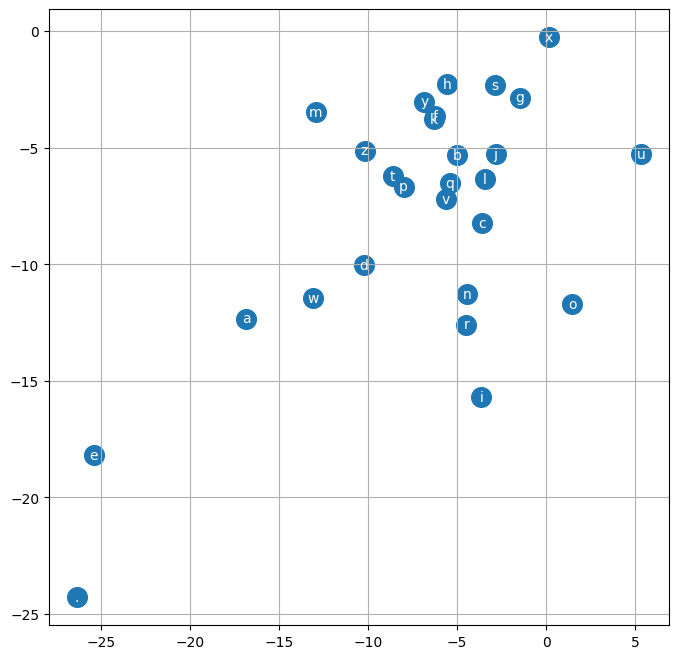

In [127]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [128]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [129]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

erraaimyazlseelmnd.
ryal.
retmrsjejdrlrg.
azejedieliihemi.
realeieiseananar.
eltzimhlkaa.
n.
sadbvrgshiries.
.
n.
jr.
eelslxnteuofnu.
zencd.
r.
ysrle.
ehs.
laaja.
sklyaa.
hia.
nalyaisun.
